In [12]:
from tensorflow.keras.preprocessing.text import one_hot

In [13]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [14]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [15]:
## Define the vocabulary size
voc_size=10000

In [16]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [17]:
### One Hot Representation

one_hot_repr = [one_hot(words, voc_size) for words in sent]

one_hot_repr


[[4921, 9847, 8714, 221],
 [4921, 9847, 8714, 177],
 [4921, 6319, 8714, 4687],
 [5796, 854, 4095, 6723, 5592],
 [5796, 854, 4095, 6723, 7171],
 [6832, 4921, 2168, 8714, 8290],
 [706, 7028, 3560, 6723]]

In [18]:
## word Embedding Representation

from tensorflow.keras.layers import Embedding
#from tensorflow.keras.processing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential

In [19]:
import numpy as np

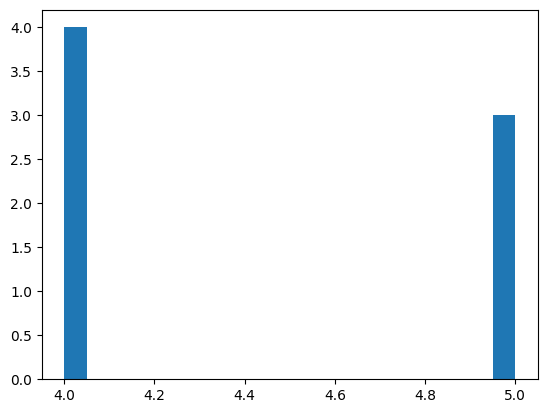

In [20]:
lengths = [len(seq) for seq in one_hot_repr]
import matplotlib.pyplot as plt
plt.hist(lengths, bins=20)
plt.show()


In [21]:
sent_length=8

##padding the encoded datas with pre '0's
embedded_docs=pad_sequences(one_hot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0    0 4921 9847 8714  221]
 [   0    0    0    0 4921 9847 8714  177]
 [   0    0    0    0 4921 6319 8714 4687]
 [   0    0    0 5796  854 4095 6723 5592]
 [   0    0    0 5796  854 4095 6723 7171]
 [   0    0    0 6832 4921 2168 8714 8290]
 [   0    0    0    0  706 7028 3560 6723]]


In [22]:
## feature representation

###
# After you have your padded sequences (which are just sequences of integers), you usually pass them through an embedding layer before feeding into your RNN / LSTM / GRU models.

#The embedding layer converts each integer (word index) into a dense vector of fixed size.

#✅ So if:

#You have dim = 10

#Each word will be represented as a dense vector of size 10.
###
#
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Why do we need this?
#Instead of using sparse or one-hot vectors (which are big and inefficient), embedding layers
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#So, what does dim = 10 mean?
#It means:

#"I want to represent each word as a dense vector of length 10."

#How to choose dim?
#There’s no fixed rule, but here are some guidelines:

#Vocabulary Size	Recommended dim
#Small (~1k words)	8–32
#Medium (~10k words)	50–100
#Large (~100k words)	200–300 (like pretrained GloVe / Word2Vec models)
#For simple tasks, dim = 10 is a reasonable starting point.

#If you're just learning or experimenting, it’s fine!





dim=10

Build the model

In [23]:
#This means:

#"I am creating a simple linear stack of layers."

#In Keras, Sequential means you’ll add layers one after the other, like stacking blocks.
model=Sequential()

#"For each word index in the input sequence, map it to a learned dense vector of size dim."
model.add(Embedding(voc_size,dim,input_length=sent_length))

#Optimizer: 'adam'

#✅ Adam is a great, fast, and adaptive optimizer.

#✅ Combines benefits of AdaGrad and RMSProp.

#Loss function: 'mse' = Mean Squared Error

#This is usually used for regression tasks.

#MSE means:

#"Minimize the square of the difference between predicted and actual values."
model.compile('adam','mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 10)             100000    
                                                                 
Total params: 100000 (390.62 KB)
Trainable params: 100000 (390.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.predict(embedded_docs)

1/1 [==============================] - 0s 101ms/step


array([[[-0.02948225,  0.02136094,  0.00842381,  0.03898021,
          0.00667825, -0.04588386, -0.02424262,  0.0223865 ,
          0.02750914,  0.0243811 ],
        [-0.02948225,  0.02136094,  0.00842381,  0.03898021,
          0.00667825, -0.04588386, -0.02424262,  0.0223865 ,
          0.02750914,  0.0243811 ],
        [-0.02948225,  0.02136094,  0.00842381,  0.03898021,
          0.00667825, -0.04588386, -0.02424262,  0.0223865 ,
          0.02750914,  0.0243811 ],
        [-0.02948225,  0.02136094,  0.00842381,  0.03898021,
          0.00667825, -0.04588386, -0.02424262,  0.0223865 ,
          0.02750914,  0.0243811 ],
        [-0.04000754,  0.03145801,  0.04420182,  0.03174751,
          0.03807496,  0.01649772, -0.0351407 ,  0.01854339,
          0.00921829, -0.00114031],
        [ 0.03789872,  0.03384454,  0.0443774 ,  0.02442373,
          0.01402492, -0.04773101, -0.03963507,  0.00561203,
         -0.01681807,  0.03859485],
        [ 0.00870172, -0.02024603,  0.03540007,  0.0

In [26]:
embedded_docs[0]

array([   0,    0,    0,    0, 4921, 9847, 8714,  221], dtype=int32)

In [27]:
model.predict(embedded_docs[0])

1/1 [==============================] - 0s 105ms/step


array([[-0.02948225,  0.02136094,  0.00842381,  0.03898021,  0.00667825,
        -0.04588386, -0.02424262,  0.0223865 ,  0.02750914,  0.0243811 ],
       [-0.02948225,  0.02136094,  0.00842381,  0.03898021,  0.00667825,
        -0.04588386, -0.02424262,  0.0223865 ,  0.02750914,  0.0243811 ],
       [-0.02948225,  0.02136094,  0.00842381,  0.03898021,  0.00667825,
        -0.04588386, -0.02424262,  0.0223865 ,  0.02750914,  0.0243811 ],
       [-0.02948225,  0.02136094,  0.00842381,  0.03898021,  0.00667825,
        -0.04588386, -0.02424262,  0.0223865 ,  0.02750914,  0.0243811 ],
       [-0.04000754,  0.03145801,  0.04420182,  0.03174751,  0.03807496,
         0.01649772, -0.0351407 ,  0.01854339,  0.00921829, -0.00114031],
       [ 0.03789872,  0.03384454,  0.0443774 ,  0.02442373,  0.01402492,
        -0.04773101, -0.03963507,  0.00561203, -0.01681807,  0.03859485],
       [ 0.00870172, -0.02024603,  0.03540007,  0.04948158, -0.01164861,
        -0.01216326,  0.01115874,  0.02479346